In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
import datetime

In [2]:
#Helper function to set the summary data for a city type row
def create_summary_row(df, drivers_count):
    #Count number of unique rides in this dataframe
    total_rides = df["ride_id"].count()
    #Get the sum of all the fares
    total_fares = df["fare"].sum()
    
    #Calculate average fare and average fare for driver
    avg_fare = total_fares / total_rides
    avg_fare_driver = total_fares / drivers_count
    return (total_rides,drivers_count,total_fares,avg_fare,avg_fare_driver)

In [3]:
def get_driver_count(city_data_df, c_type):
    print(city_data_df.head())
    driver_count = city_data_df[city_data_df["type"] == c_type]["driver_count"].sum()
    return driver_count

In [4]:
# Files to load
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(city_data_df,ride_data_df, how="left", on=["city", "city"])
# Display the DataFrame
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [6]:
# Create the Urban, Suburban and Rural city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_cities_df.head()

39854.380000000005


,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2019-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2019-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2019-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2019-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2019-03-15 12:09:42,31.58,2552978514662


In [7]:
#Calculate the driver count from the original city data for each city type
d_count_u = get_driver_count(city_data_df, "Urban")
d_count_s = get_driver_count(city_data_df, "Suburban")
d_count_r = get_driver_count(city_data_df, "Rural")

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


In [ ]:
#Create the summary row for each city type
urban_row = create_summary_row(urban_cities_df,d_count_u)
suburban_row = create_summary_row(suburban_cities_df,d_count_s)
rural_row = create_summary_row(rural_cities_df,d_count_r)

In [ ]:
#Add summary rows to an array to pass into creating a new DataFrame
rows = []
rows.append(rural_row)
rows.append(suburban_row)
rows.append(urban_row)

In [8]:
#Rename the columns and indices
summary_df = pd.DataFrame(rows, columns=['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver'], index=['Rural','Suburban','Urban'])
#Reset index
summary_df.index.name = None

In [9]:
#Set proper Output Style for Part I of Challenge
summary_df.style.format({'Total Rides': "{:,}",'Total Fares': "${:,.2f}",'Total Drivers': '{:,}', 'Average Fare per Ride': '${:.2f}', 'Average Fare per Driver': '${:.2f}'})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [19]:
pyber_data_df=pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df.set_index(pyber_data_df['Date'], inplace=True)

In [60]:
#Make a copy from the merged dataset on four columns
fares_df = pyber_data_df[["Date","City","City Type","Fare"]].copy()
#Create a new column as a DateTime object from the Date provided
fares_df["DateTime"] = pd.to_datetime(fares_df["Date"])
#Drop the Date Columns
fares_df.drop(["Date"],axis=1,inplace=True)
#Set the index to DateTime
fares_df.set_index('DateTime',inplace=True)
fares_df.head()

,City,City Type,Fare
DateTime,,,
2019-02-24 08:40:38,Richardfort,Urban,13.93
2019-02-13 12:46:07,Richardfort,Urban,14.00
2019-02-16 13:52:19,Richardfort,Urban,17.92
2019-02-01 20:18:28,Richardfort,Urban,10.26
2019-04-17 02:26:37,Richardfort,Urban,23.00


In [61]:
fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-02-24 08:40:38 to 2019-04-12 18:11:50
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       2375 non-null   object 
 1   City Type  2375 non-null   object 
 2   Fare       2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [53]:
#Group the Fare and DateTime data by City Type
city_date_df = fares_df.groupby(["City Type", "DateTime"]).sum()
#Reset the Index
city_date_df.index.name = None
city_date_df.head()

Fare
City Type DateTime                  
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33

In [56]:
#Create a Pivot Table on City Type for the column, indexed on DateTime and looking at Fare
city_pivot_df = city_date_df.pivot_table(index="DateTime", columns="City Type")["Fare"]
city_pivot_df.head()

City Type,Rural,Suburban,Urban
DateTime,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [114]:
#From the pivot table, filter 2019 Jan-April dates.
city_pivot_dates_df=city_pivot_df.loc['2019-01-01':'2019-04-28']
#Resample to get the sums of the Fares per week
city_pivot_dates_resample_df=city_pivot_dates_df.resample('7D').sum()
city_pivot_dates_resample_df.head()

City Type,Rural,Suburban,Urban
DateTime,,,
2019-01-01,187.92,876.61,1879.70
2019-01-08,139.80,1080.40,2193.36
2019-01-15,233.85,1163.93,2105.90
2019-01-22,210.94,1285.13,1846.98
2019-01-29,361.50,1079.58,2085.77


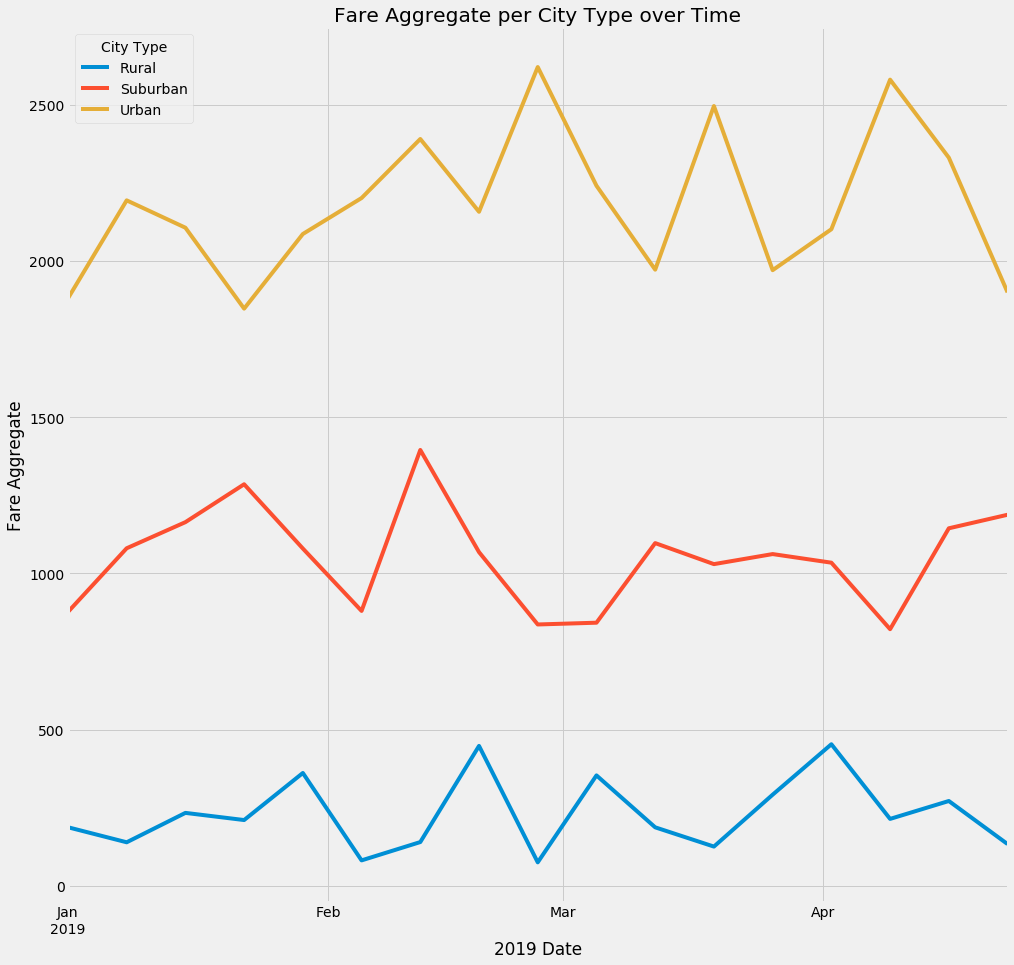

In [113]:
#Plot the Chart
style.use('fivethirtyeight')
#Plot data and increase figure size
ax = city_pivot_dates_resample_df.plot(figsize=(15,15))
#Set title and x,y labels
ax.set_title('Fare Aggregate per City Type over Time')
ax.set_xlabel('2019 Date')
ax.set_ylabel('Fare Aggregate')
#Save plot to file
plt.savefig('./analysis/fare_sum_city_type.png')